In [1]:
from google.colab import drive
drive.mount('/content/drive')


Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf

In [0]:
ROOT = '/content/drive/My Drive/19 Fall/CSE 569/Project'

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
features = np.empty((0, 32, 32, 3))
labels = []
filenames = []

In [144]:
features.shape

(0, 32, 32, 3)

In [0]:
for i in range(5):
  with open(ROOT + '/cifar/data_batch_' + str(i+1), mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')
    features_batch = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    if features.size == 0:
      features = features_batch
    else:
      features = np.concatenate((features, features_batch), axis=0)
    labels.extend(batch['labels'])
    filenames.extend(batch['filenames'])

In [146]:
print(features.shape, len(labels), len(filenames))

(50000, 32, 32, 3) 50000 50000


In [147]:
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
for key, value in label_counts.items():
    print(key, label_names[key], value)

0 airplane 5000
1 automobile 5000
2 bird 5000
3 cat 5000
4 deer 5000
5 dog 5000
6 frog 5000
7 horse 5000
8 ship 5000
9 truck 5000



Example of Image 47000:
Image - Min Value: 21 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


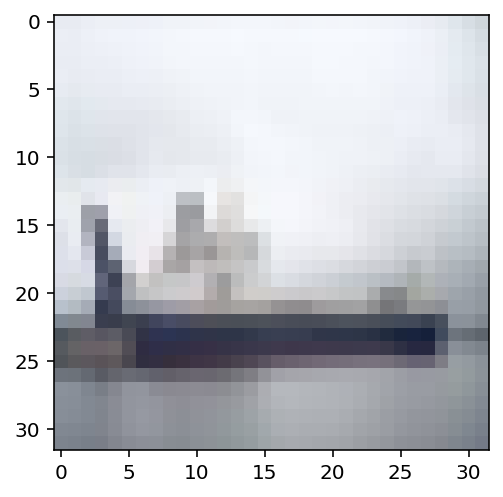

In [148]:
sample_id = 47000
sample_image = features[sample_id]
sample_label = labels[sample_id]
print('\nExample of Image {}:'.format(sample_id))
print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
print('Image - Shape: {}'.format(sample_image.shape))
print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
plt.imshow(sample_image)

In [0]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [0]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [0]:
features = normalize(features)
labels = one_hot_encode(labels)
labels = np.asarray(labels)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [153]:
X_train.shape

(32000, 32, 32, 3)

In [154]:
X_test.shape

(10000, 32, 32, 3)

In [155]:
X_val.shape

(8000, 32, 32, 3)

In [157]:
y_train.shape

(32000, 10)

In [158]:
y_test.shape

(10000, 10)

In [159]:
y_val.shape

(8000, 10)

In [0]:
pickle.dump(X_train, open(ROOT + '/cifar/X_train', 'wb'))
pickle.dump(X_test, open(ROOT + '/cifar/X_test', 'wb'))
pickle.dump(X_val, open(ROOT + '/cifar/X_val', 'wb'))
pickle.dump(y_train, open(ROOT + '/cifar/y_train', 'wb'))
pickle.dump(y_test, open(ROOT + '/cifar/y_test', 'wb'))
pickle.dump(y_val, open(ROOT + '/cifar/y_val', 'wb'))

In [141]:
X_train = pickle.load(open(ROOT + '/cifar/X_train', mode='rb'))
X_train.shape

(32000, 32, 32, 3)

In [161]:
X_test = pickle.load(open(ROOT + '/cifar/X_test', mode='rb'))
X_test.shape

(10000, 32, 32, 3)

In [162]:
X_val = pickle.load(open(ROOT + '/cifar/X_val', mode='rb'))
X_val.shape

(8000, 32, 32, 3)

In [163]:
y_train = pickle.load(open(ROOT + '/cifar/y_train', mode='rb'))
y_train.shape

(32000, 10)

In [164]:
y_test = pickle.load(open(ROOT + '/cifar/y_test', mode='rb'))
y_test.shape

(10000, 10)

In [165]:
y_val = pickle.load(open(ROOT + '/cifar/y_val', mode='rb'))
y_val.shape

(8000, 10)